In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

import tensorflow as tf

from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Dropout,
    GlobalAveragePooling2D,
    GlobalAveragePooling3D,
)

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.17.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_path = "/home/hany_jr/Ai/Plant-Diseases/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/home/hany_jr/Ai/Plant-Diseases/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [5]:
train_generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None,
    validation_split=0.1,
    rescale=1 / 255.0,
).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    color_mode="rgb",
    subset="training",
)

valid_generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1 / 255.0,
    preprocessing_function=None,
).flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    color_mode="rgb",
)

Found 63282 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
def model():
    model = Sequential(
        [
            # 1st Convolutional Layer
            Conv2D(
                128,
                kernel_size=(3, 3),
                strides=(2, 2),
                padding="valid",
                input_shape=(224, 224, 3),
                activation="relu",
            ),
            MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
            BatchNormalization(),
            # 2nd Convolutional Layer
            Conv2D(
                256,
                kernel_size=(6, 6),
                strides=(1, 1),
                padding="valid",
                activation="relu",
            ),
            MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
            BatchNormalization(),
            # 3rd Convolutional Layer
            Conv2D(
                512,
                kernel_size=(3, 3),
                strides=(1, 1),
                padding="valid",
                activation="relu",
            ),
            BatchNormalization(),
            # 4th Convolutional Layer
            Conv2D(
                512,
                kernel_size=(3, 3),
                strides=(1, 1),
                padding="valid",
                activation="relu",
            ),
            BatchNormalization(),
            # 5th Convolutional Layer
            Conv2D(
                256,
                kernel_size=(3, 3),
                strides=(1, 1),
                padding="valid",
                activation="relu",
            ),
            MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
            BatchNormalization(),
            # Passing it to a Fully Connected layer
            # 1st Fully Connected Layer
            Flatten(),
            # 2nd Fully Connected Layer
            Dense(4096, activation="relu"),
            Dropout(0.35),
            BatchNormalization(),
            # 3rd Fully Connected Layer
            Dense(2048, activation="relu"),
            Dropout(0.35),
            BatchNormalization(),
            # 4th Fully Connected Layer
            Dense(1024, activation="relu"),
            Dropout(0.15),
            BatchNormalization(),
            # Output Layer
            Dense(38, activation="softmax"),
        ]
    )

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )
    return model


CNNModel = model()
CNNModel.summary()

I0000 00:00:1730154923.199575   68417 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730154923.199728   68417 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730154923.199785   68417 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730154923.254909   68417 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 111, 111, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 19, 19, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    84,938,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 101,405,222 (386.83 MB)

 Trainable params: 101,387,558 (386.76 MB)

 Non-trainable params: 17,664 (69.00 KB)

In [15]:
history = CNNModel.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1,
    callbacks=[
        EarlyStopping(patience=3),
        ModelCheckpoint("CNNModel.keras", save_best_only=True),
        ReduceLROnPlateau(patience=2),
    ],
    validation_steps=500,
    steps_per_epoch=500,
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.9434 - loss: 0.1753 - val_accuracy: 0.9646 - val_loss: 0.1099 - learning_rate: 1.0000e-04
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 134ms/step - accuracy: 0.9518 - loss: 0.1412 - val_accuracy: 0.9358 - val_loss: 0.2061 - learning_rate: 1.0000e-04
Epoch 3/10
  1/500 ━━━━━━━━━━━━━━━━━━━━ 1:04 130ms/step - accuracy: 0.9375 - loss: 0.1864

2024-10-29 01:53:21.409356: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 157ms/step - accuracy: 0.9550 - loss: 0.1336 - val_accuracy: 0.9616 - val_loss: 0.1176 - learning_rate: 1.0000e-04
Epoch 4/10
478/500 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9604 - loss: 0.1231

2024-10-29 01:55:44.260619: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5392881532373760818


500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.9605 - loss: 0.1230 - val_accuracy: 0.9765 - val_loss: 0.0900 - learning_rate: 1.0000e-05
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9625 - loss: 0.1149 - val_accuracy: 0.9728 - val_loss: 0.0837 - learning_rate: 1.0000e-05
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 135ms/step - accuracy: 0.9622 - loss: 0.1180 - val_accuracy: 0.9739 - val_loss: 0.0892 - learning_rate: 1.0000e-05
Epoch 7/10
  1/500 ━━━━━━━━━━━━━━━━━━━━ 1:04 130ms/step - accuracy: 1.0000 - loss: 0.0274

2024-10-29 01:58:17.890844: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5234758210994913371
2024-10-29 01:58:17.890871: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5392881532373760818


500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9610 - loss: 0.1184 - val_accuracy: 0.9742 - val_loss: 0.0827 - learning_rate: 1.0000e-05
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.9599 - loss: 0.1180 - val_accuracy: 0.9803 - val_loss: 0.0632 - learning_rate: 1.0000e-05
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 157ms/step - accuracy: 0.9629 - loss: 0.1206 - val_accuracy: 0.9737 - val_loss: 0.0800 - learning_rate: 1.0000e-05
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 135ms/step - accuracy: 0.9614 - loss: 0.1151 - val_accuracy: 0.9784 - val_loss: 0.0710 - learning_rate: 1.0000e-05


2024-10-29 02:03:14.142858: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5392881532373760818


In [16]:
loss, accuracy = CNNModel.evaluate(valid_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9764 - loss: 0.0766
Loss: 0.07820151001214981, Accuracy: 0.974732518196106


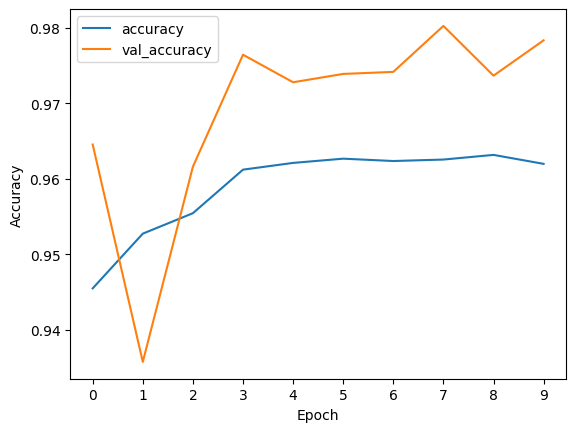

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xticks(range(0, 10))

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

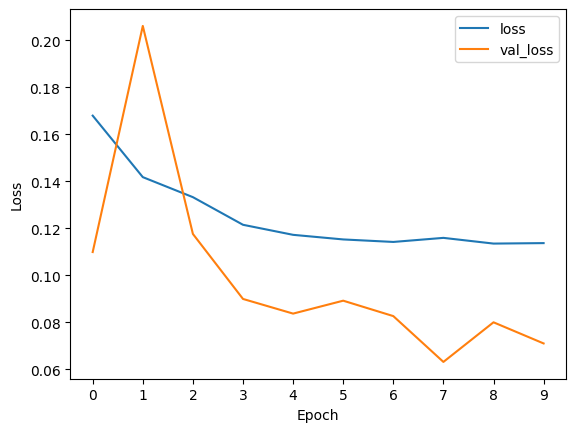

In [19]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xticks(range(0, 10))

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()